In [175]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import numpy as np

from jupyterthemes import jtplot
jtplot.style()

In [53]:
data=load_boston()

In [62]:
x=np.asarray(data.data)
y=np.asarray(data.target)

In [105]:
#KNeighborsRegressor
# define the parameter values that should be searched
k_range = list(range(1, 31))
a_range= list(['auto', 'ball_tree', 'kd_tree', 'brute'])
print(a_range)

['auto', 'ball_tree', 'kd_tree', 'brute']


In [115]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [116]:
knn=KNeighborsRegressor()
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [117]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='explained_variance')

In [118]:
# fit the grid with data
grid.fit(x, y)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='explained_variance', verbose=0)

In [119]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0006947517395019531
std_fit_time : 0.00045515777773028494
mean_score_time : 0.0008024930953979492
std_score_time : 0.0006018004058508942
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : -1.8044420686006521
split1_test_score : -3.5344431681140884
split2_test_score : -5.017971928932231
split3_test_score : 0.2072756434548152
split4_test_score : -0.1451989546575001
split5_test_score : -0.27970501800465186
split6_test_score : -1.6449065032235612
split7_test_score : 0.17372221551114664
split8_test_score : -0.7863435010751816
split9_test_score : -0.4575099268935312
mean_test_score : -1.3340921858134902
std_test_score : 1.6467715348523344
rank_test_score : 26
split0_train_score : 1.0
split1_train_score : 1.0
split2_train_score : 1.0
split3_train_score : 1.0
split4_train_score : 1.0
split5_train_score : 1.0
split6_train_score : 1.0
split7_train_score : 1.0
split8_train_score : 1.0
split9_train_score : 1.0
mean_train_score : 1.0
std_train_score : 0.0


C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.

In [120]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[-1.33409219 -1.58669555 -1.63664836 -1.51743355 -1.51055731 -1.14882753
 -0.97583124 -0.79360241 -0.61060547 -0.49012726 -0.40556602 -0.32491963
 -0.27986544 -0.21874371 -0.21559426 -0.18689095 -0.15550714 -0.12593966
 -0.12195832 -0.08666813 -0.08127616 -0.0749547  -0.07894255 -0.07275709
 -0.06516351 -0.06405429 -0.06277941 -0.06694215 -0.06729631 -0.06322524]


Text(0, 0.5, 'Cross valifated explained_variance')

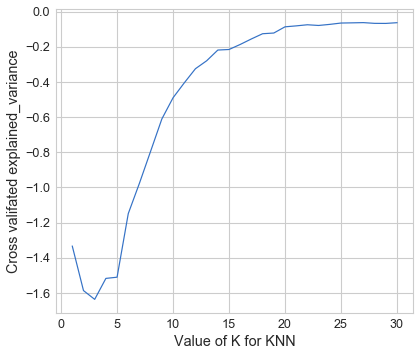

In [121]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross valifated explained_variance')

In [122]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

-0.06277940853375745
{'n_neighbors': 27}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=27, p=2,
          weights='uniform')


In [186]:
#LogisticRegression
t_range=list([0.001, 0.01, 0.1, 1, 10, 100, 1000])
s_range=list(['random', 'cyclic'])
a_range=list([0.001, 0.01, 0.1, 1, 10, 100, 1000])

In [203]:
param_grid = dict(alpha=a_range, selection=s_range, tol=t_range)
param_grid

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'selection': ['random', 'cyclic'],
 'tol': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [204]:
model=Lasso()
model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [205]:
grid = GridSearchCV(model, param_grid, cv=10)

In [206]:
grid.fit(x, y)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'selection': ['random', 'cyclic'], 'tol': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [207]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0012071609497070312
std_fit_time : 0.00041697658864129337
mean_score_time : 0.00020008087158203126
std_score_time : 0.00040016209829167414
param_alpha : 0.001
param_selection : random
param_tol : 0.001
params : {'alpha': 0.001, 'selection': 'random', 'tol': 0.001}
split0_test_score : 0.7339120344108239
split1_test_score : 0.47528381006464804
split2_test_score : -0.9790696242746371
split3_test_score : 0.640455620630791
split4_test_score : 0.5494433062299713
split5_test_score : 0.7370987123954744
split6_test_score : 0.3802633474887729
split7_test_score : -0.12965676028494877
split8_test_score : -0.7689953220126582
split9_test_score : 0.4183686373714366
mean_test_score : 0.20753421336055491
std_test_score : 0.5906031886176827
rank_test_score : 20
split0_train_score : 0.738808684077633
split1_train_score : 0.7470874653636754
split2_train_score : 0.7438288879956081
split3_train_score : 0.7172077315227222
split4_train_score : 0.7417196085995358
split5_train_score : 0.704309

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.

In [208]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[ 2.07534213e-01  2.07529822e-01  2.12546511e-01  3.31534677e-01
 -1.05481078e-01 -4.17681715e-01 -2.46323780e-01  2.07536297e-01
  2.07531384e-01  2.03624956e-01  2.24079279e-01 -1.67192862e-01
 -1.67192862e-01 -1.67192862e-01  2.32279981e-01  2.32554367e-01
  2.08554903e-01  1.18876790e-01 -3.69766643e-01  1.41143328e-01
  8.96884413e-02  2.32320262e-01  2.32441499e-01  2.25831011e-01
  2.17342938e-01 -1.59941865e-01 -1.59941865e-01 -1.59941865e-01
  2.66976750e-01  2.66075922e-01  2.46536198e-01 -1.13006232e-03
 -4.77206416e-01  1.17447078e-01 -3.15285566e-01  2.67037700e-01
  2.67452371e-01  2.58951082e-01  2.28703221e-01 -1.44140710e-01
 -1.44140710e-01 -1.44140710e-01  1.99317098e-01  2.00978741e-01
  1.80259933e-01  7.04797582e-02 -5.79522209e-01  1.16925427e-01
 -2.34539630e-01  1.99333635e-01  1.99686785e-01  1.89421263e-01
  2.43184625e-01 -1.60660004e-01 -1.60660004e-01 -1.60660004e-01
 -2.80000800e-02 -3.17943456e-02 -3.98754789e-02 -1.05990182e-01
 -8.46761511e-01 -5.33585

In [211]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.3315346766586387
{'alpha': 0.001, 'selection': 'random', 'tol': 1}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='random', tol=1, warm_start=False)
